In [147]:
#importer les package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

In [148]:
#lire la base de donnees
df=pd.read_csv('Mubwab_scraping.csv')
df

,titre,lien,date_pub,place,prix_partir,prix_m,standing,description
0,Résidence Eglantine,https://www.mubawab.ma/fr/p/3366/r%C3%A9sidenc...,Publié il y a 5 mois,Oasis à Casablanca,À partir de 1 462 000 DH,Not found!,"['Haut standing', 'Finalisé']",Nichée au plein milieu des villas du quartier ...
1,Shems Al Madina - Lots de Villas,https://www.mubawab.ma/fr/p/1730/shems-al-madi...,Publié il y a 5 mois,Golf de Benslimane à Benslimane,À partir de 475 000 DH,2 500DH / m²,"['Haut standing', 'En cours de construction']",Shems Almadina Benslimane offrent à ses réside...
2,"Ô Mâarif, votre investissement au centre de Ca...",https://www.mubawab.ma/fr/p/2847/%C3%B4-m%C3%A...,Publié il y a 5 mois,Maârif à Casablanca,À partir de 1 699 000 DH,Not found!,"['Haut standing', 'Finalisé']",Le projet Ô Maarif s’inscrit dans une volonté ...
3,Famille D'amour,https://www.mubawab.ma/fr/p/3479/famille-d-amour,Publié il y a 5 mois,Bourgogne Ouest à Casablanca,Prix à consulter,17 500DH / m²,"['Haut standing', 'Finalisé']",Votre nid familial en plein centre de Casablan...
4,Résidence Duo Verde,https://www.mubawab.ma/fr/p/3365/r%C3%A9sidenc...,Publié il y a 5 mois,Oasis à Casablanca,À partir de 1 308 000 DH,Not found!,"['Haut standing', 'Finalisé']",Une réussite architecturale au cœur d'un quart...
...,...,...,...,...,...,...,...,...
147,Gloria Beach,https://www.mubawab.ma/fr/p/3448/gloria-beach,Publié il y a 2 mois,Sidi Rahal,À partir de 690 000 DH,9 500DH / m²,"['Haut standing', 'Finalisé', 'Livraison décem...","Située à 25 km au Sud de Casablanca, Gloria of..."
148,Projet IKRAM,https://www.mubawab.ma/fr/p/3296/projet-ikram,Publié il y a 2 mois,Médiouna,À partir de 230 000 DH,Not found!,"['Économique', 'Finalisé']",Trouver votre bonheur dans un espace pertinent...
149,Norway Amira,https://www.mubawab.ma/fr/p/3424/norway-amira,Publié il y a 2 mois,Aïn Sebaâ à Casablanca,À partir de 780 000 DH,10 000DH / m²,"['Moyen standing', 'Finalisé']",Norway Amira est le résultat d’une étude détai...
150,Bougainvillier,https://www.mubawab.ma/fr/p/3493/bougainvillier,Publié il y a 2 mois,Tenoukchet à Mohammedia,À partir de 690 000 DH,Not found!,"['Moyen standing', 'Finalisé']",La Résidence Bougainvillier se situe à l’entré...


In [149]:
df.head()

,titre,lien,date_pub,place,prix_partir,prix_m,standing,description
0,Résidence Eglantine,https://www.mubawab.ma/fr/p/3366/r%C3%A9sidenc...,Publié il y a 5 mois,Oasis à Casablanca,À partir de 1 462 000 DH,Not found!,"['Haut standing', 'Finalisé']",Nichée au plein milieu des villas du quartier ...
1,Shems Al Madina - Lots de Villas,https://www.mubawab.ma/fr/p/1730/shems-al-madi...,Publié il y a 5 mois,Golf de Benslimane à Benslimane,À partir de 475 000 DH,2 500DH / m²,"['Haut standing', 'En cours de construction']",Shems Almadina Benslimane offrent à ses réside...
2,"Ô Mâarif, votre investissement au centre de Ca...",https://www.mubawab.ma/fr/p/2847/%C3%B4-m%C3%A...,Publié il y a 5 mois,Maârif à Casablanca,À partir de 1 699 000 DH,Not found!,"['Haut standing', 'Finalisé']",Le projet Ô Maarif s’inscrit dans une volonté ...
3,Famille D'amour,https://www.mubawab.ma/fr/p/3479/famille-d-amour,Publié il y a 5 mois,Bourgogne Ouest à Casablanca,Prix à consulter,17 500DH / m²,"['Haut standing', 'Finalisé']",Votre nid familial en plein centre de Casablan...
4,Résidence Duo Verde,https://www.mubawab.ma/fr/p/3365/r%C3%A9sidenc...,Publié il y a 5 mois,Oasis à Casablanca,À partir de 1 308 000 DH,Not found!,"['Haut standing', 'Finalisé']",Une réussite architecturale au cœur d'un quart...


In [150]:
df.columns#afficher les colonnes

Index(['titre', 'lien', 'date_pub', 'place', 'prix_partir', 'prix_m',
       'standing', 'description'],
      dtype='object')

In [151]:
#voir les informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        152 non-null    object
 1   lien         152 non-null    object
 2   date_pub     152 non-null    object
 3   place        152 non-null    object
 4   prix_partir  152 non-null    object
 5   prix_m       152 non-null    object
 6   standing     152 non-null    object
 7   description  152 non-null    object
dtypes: object(8)
memory usage: 9.6+ KB


In [152]:
df['titre']

0                                    Résidence Eglantine
1                       Shems Al Madina - Lots de Villas
2      Ô Mâarif, votre investissement au centre de Ca...
3                                        Famille D'amour
4                                    Résidence Duo Verde
                             ...                        
147                                         Gloria Beach
148                                         Projet IKRAM
149                                         Norway Amira
150                                       Bougainvillier
151                               Villa Estrilla Cherrat
Name: titre, Length: 152, dtype: object

In [153]:
df['date_pub']

0      Publié il y a 5 mois
1      Publié il y a 5 mois
2      Publié il y a 5 mois
3      Publié il y a 5 mois
4      Publié il y a 5 mois
               ...         
147    Publié il y a 2 mois
148    Publié il y a 2 mois
149    Publié il y a 2 mois
150    Publié il y a 2 mois
151    Publié il y a 2 mois
Name: date_pub, Length: 152, dtype: object

In [154]:
df['date_pub']=df['date_pub'].replace('Publié il y a plus de ','',regex=True)
df['date_pub']

0      Publié il y a 5 mois
1      Publié il y a 5 mois
2      Publié il y a 5 mois
3      Publié il y a 5 mois
4      Publié il y a 5 mois
               ...         
147    Publié il y a 2 mois
148    Publié il y a 2 mois
149    Publié il y a 2 mois
150    Publié il y a 2 mois
151    Publié il y a 2 mois
Name: date_pub, Length: 152, dtype: object

In [155]:
df['date_pub']=df['date_pub'].replace('mois','',regex=True)
df['date_pub']

0      Publié il y a 5 
1      Publié il y a 5 
2      Publié il y a 5 
3      Publié il y a 5 
4      Publié il y a 5 
             ...       
147    Publié il y a 2 
148    Publié il y a 2 
149    Publié il y a 2 
150    Publié il y a 2 
151    Publié il y a 2 
Name: date_pub, Length: 152, dtype: object

In [156]:
df['date_pub'].unique()

array(['Publié il y a 5 ', '6 ', 'Publié il y a 2 '], dtype=object)

In [157]:
df['date_pub']=df['date_pub'].replace('Publié il y a ','',regex=True)

In [158]:
df['date_pub'].value_counts()

6     90
2     32
5     30
Name: date_pub, dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        152 non-null    object
 1   lien         152 non-null    object
 2   date_pub     152 non-null    object
 3   place        152 non-null    object
 4   prix_partir  152 non-null    object
 5   prix_m       152 non-null    object
 6   standing     152 non-null    object
 7   description  152 non-null    object
dtypes: object(8)
memory usage: 9.6+ KB


In [160]:
df['date_pub']=df['date_pub'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        152 non-null    object
 1   lien         152 non-null    object
 2   date_pub     152 non-null    int32 
 3   place        152 non-null    object
 4   prix_partir  152 non-null    object
 5   prix_m       152 non-null    object
 6   standing     152 non-null    object
 7   description  152 non-null    object
dtypes: int32(1), object(7)
memory usage: 9.0+ KB


In [161]:
df['place']

0                   Oasis à Casablanca
1      Golf de Benslimane à Benslimane
2                  Maârif à Casablanca
3         Bourgogne Ouest à Casablanca
4                   Oasis à Casablanca
                    ...               
147                         Sidi Rahal
148                           Médiouna
149             Aïn Sebaâ à Casablanca
150            Tenoukchet à Mohammedia
151      Plage Oued Cherrat à Bouznika
Name: place, Length: 152, dtype: object

In [162]:
#split 'à' ex Hay Dakhla à Agadir (place)= bernousi(secteur)+casa(ville)
df=df.reset_index(drop=True)
for i ,row in df.iterrows():
    sctr=str(row['place'])
    if('à' in sctr):
        sctr2=sctr.split('à')
        df.at[i,'secteur']=sctr2[0]
        df.at[i,'ville']=sctr2[1]
    else :
        df.at[i,'ville']=sctr

In [163]:
df['secteur']

0                   Oasis 
1      Golf de Benslimane 
2                  Maârif 
3         Bourgogne Ouest 
4                   Oasis 
              ...         
147                    NaN
148                    NaN
149             Aïn Sebaâ 
150            Tenoukchet 
151    Plage Oued Cherrat 
Name: secteur, Length: 152, dtype: object

In [164]:
df['ville']

0       Casablanca
1       Benslimane
2       Casablanca
3       Casablanca
4       Casablanca
          ...     
147     Sidi Rahal
148       Médiouna
149     Casablanca
150     Mohammedia
151       Bouznika
Name: ville, Length: 152, dtype: object

In [165]:
df['secteur'].value_counts()

Oasis                           11
Californie                      11
Aïn Sebaâ                        7
Plage Oued Cherrat               7
Golf de Benslimane               6
Quartier du Parc                 5
Casablanca Finance City          4
Maârif Extension                 3
City Dar Es Salaam               3
Hay Hassani                      3
Centre Ville                     3
Bernoussi                        2
Entrée Sud                       2
Ain Borja                        2
Administratif                    2
Les Hôpitaux                     2
Bourgogne Ouest                  2
Roches Noires                    2
Oulfa                            1
Hay Moulay Rachid 1              1
Sidi Abdelkarim                  1
Ferme Bretonne (Hay Arraha)      1
Benjdia                          1
Hay salam                        1
Les princesses                   1
Lissasfa                         1
Ain Chock                        1
Mannesmann                       1
Anfa                

In [166]:
df['secteur'].unique()

array(['Oasis ', 'Golf de Benslimane ', 'Maârif ', 'Bourgogne Ouest ',
       'Plage Oued Cherrat ', nan, 'Centre Ville ', 'Californie ',
       'Quartier du Parc ', 'Ahl Loghlam (Hay Assalam) ',
       'Administratif ', 'Aïn Sebaâ ', 'Casablanca Finance City ',
       'Maârif Extension ', 'City Dar Es Salaam ', 'Les Hôpitaux ',
       'Franceville ', 'Bernoussi ', 'Val Fleury ', 'Roches Noires ',
       'Mannesmann ', 'Mandarona ', 'Les Cretes ', 'Riad Essalam ',
       'Hay Toummert ', 'Anfa ', 'Entrée Sud ', 'Hay Hassani ',
       'Hay Moulay Rachid 1 ', 'Ain Chock ', 'Lissasfa ',
       'Les princesses ', 'Hay salam ', 'Benjdia ', 'Ain Borja ',
       'Oulfa ', 'Sidi Abdelkarim ', 'Ferme Bretonne (Hay Arraha) ',
       'Tenoukchet '], dtype=object)

In [167]:
# Remplacer les valeurs manquantes par un champ ou supprimer les valeur manquantes par dropna
df['secteur'].fillna('sans', inplace=True)
#df=df.dropna(subset=['secteur'])

In [168]:
df['secteur']

0                   Oasis 
1      Golf de Benslimane 
2                  Maârif 
3         Bourgogne Ouest 
4                   Oasis 
              ...         
147                   sans
148                   sans
149             Aïn Sebaâ 
150            Tenoukchet 
151    Plage Oued Cherrat 
Name: secteur, Length: 152, dtype: object

In [169]:
df.isnull().sum().any()

False

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        152 non-null    object
 1   lien         152 non-null    object
 2   date_pub     152 non-null    int32 
 3   place        152 non-null    object
 4   prix_partir  152 non-null    object
 5   prix_m       152 non-null    object
 6   standing     152 non-null    object
 7   description  152 non-null    object
 8   secteur      152 non-null    object
 9   ville        152 non-null    object
dtypes: int32(1), object(9)
memory usage: 11.4+ KB


In [171]:
df['prix_partir']

0      À partir de 1 462 000 DH
1        À partir de 475 000 DH
2      À partir de 1 699 000 DH
3              Prix à consulter
4      À partir de 1 308 000 DH
                 ...           
147      À partir de 690 000 DH
148      À partir de 230 000 DH
149      À partir de 780 000 DH
150      À partir de 690 000 DH
151    À partir de 4 500 000 DH
Name: prix_partir, Length: 152, dtype: object

In [172]:
df['prix_partir']=df['prix_partir'].replace('À partir de ','',regex=True)
df['prix_partir']

0          1 462 000 DH
1            475 000 DH
2          1 699 000 DH
3      Prix à consulter
4          1 308 000 DH
             ...       
147          690 000 DH
148          230 000 DH
149          780 000 DH
150          690 000 DH
151        4 500 000 DH
Name: prix_partir, Length: 152, dtype: object

In [173]:
df['prix_partir'].unique()

array(['1 462 000 DH', '475 000 DH', '1 699 000 DH', 'Prix à consulter',
       '1 308 000 DH', '1 850 000 DH', '750 000 DH', '756 000 DH',
       '1 070 000 DH', '802 105 DH', '540 000 DH', '250 000 DH',
       '1 625 000 DH', '1 230 000 DH', '790 000 DH', '716 000 DH',
       '978 500 DH', '1 357 000 DH', '3 980 000 DH', '773 000 DH',
       '1 789 000 DH', '519 303 DH', '1 960 000 DH', '519 000 DH',
       '850 000 DH', '1 350 000 DH', '1 200 000 DH', '690 000 DH',
       '960 000 DH', '890 000 DH', '220 000 DH', '950 000 DH',
       '3 500 000 DH', '1 486 000 DH', '899 000 DH', '860 000 DH',
       '848 000 DH', '500 000 DH', '720 000 DH', '660 000 DH',
       '1 857 380 DH', '1 000 000 DH', '823 000 DH', '1 600 000 DH',
       '1 420 000 DH', '1 541 000 DH', '2 900 000 DH', '680 000 DH',
       '1 690 000 DH', '770 000 DH', '1 884 080 DH', '2 800 000 DH',
       '1 848 000 DH', '3 420 000 DH', '1 820 000 DH', '840 000 DH',
       '4 100 000 DH', '695 500 DH', '1 255 500 DH', '700 

In [174]:
df=df.reset_index(drop=True)
c=0
for i ,rw in df.iterrows():
    pr=str(rw['prix_partir'])
    if('DH' in pr):
        c += 1
print(c)

135


In [175]:
df['prix_partir']=='Prix à consulter'

0      False
1      False
2      False
3       True
4      False
       ...  
147    False
148    False
149    False
150    False
151    False
Name: prix_partir, Length: 152, dtype: bool

In [176]:
df.drop(df.loc[df['prix_partir']=='Prix à consulter'].index, inplace=True)
df['prix_partir'].unique()

array(['1 462 000 DH', '475 000 DH', '1 699 000 DH', '1 308 000 DH',
       '1 850 000 DH', '750 000 DH', '756 000 DH', '1 070 000 DH',
       '802 105 DH', '540 000 DH', '250 000 DH', '1 625 000 DH',
       '1 230 000 DH', '790 000 DH', '716 000 DH', '978 500 DH',
       '1 357 000 DH', '3 980 000 DH', '773 000 DH', '1 789 000 DH',
       '519 303 DH', '1 960 000 DH', '519 000 DH', '850 000 DH',
       '1 350 000 DH', '1 200 000 DH', '690 000 DH', '960 000 DH',
       '890 000 DH', '220 000 DH', '950 000 DH', '3 500 000 DH',
       '1 486 000 DH', '899 000 DH', '860 000 DH', '848 000 DH',
       '500 000 DH', '720 000 DH', '660 000 DH', '1 857 380 DH',
       '1 000 000 DH', '823 000 DH', '1 600 000 DH', '1 420 000 DH',
       '1 541 000 DH', '2 900 000 DH', '680 000 DH', '1 690 000 DH',
       '770 000 DH', '1 884 080 DH', '2 800 000 DH', '1 848 000 DH',
       '3 420 000 DH', '1 820 000 DH', '840 000 DH', '4 100 000 DH',
       '695 500 DH', '1 255 500 DH', '700 000 DH', '240 000 DH

In [177]:
df=df.reset_index(drop=True)
maxx=0
for i ,row in df.iterrows():
    sctr=str(row['prix_partir'])
    if('DH' in sctr):
        df.at[i,'prix_partir']=int(''.join(filter(str.isdigit,sctr)))*1
        maxx += 1
    else :
        df.at[i,'prix_partir']=int(''.join(filter(str.isdigit,sctr)))
print(maxx)

135


In [178]:
df['prix_partir'].unique()

array([1462000, 475000, 1699000, 1308000, 1850000, 750000, 756000,
       1070000, 802105, 540000, 250000, 1625000, 1230000, 790000, 716000,
       978500, 1357000, 3980000, 773000, 1789000, 519303, 1960000, 519000,
       850000, 1350000, 1200000, 690000, 960000, 890000, 220000, 950000,
       3500000, 1486000, 899000, 860000, 848000, 500000, 720000, 660000,
       1857380, 1000000, 823000, 1600000, 1420000, 1541000, 2900000,
       680000, 1690000, 770000, 1884080, 2800000, 1848000, 3420000,
       1820000, 840000, 4100000, 695500, 1255500, 700000, 240000, 403000,
       640800, 2500000, 1055000, 1137000, 440000, 970000, 810000, 550000,
       3800000, 858000, 180000, 448500, 1500000, 270000, 570000, 2150000,
       1501000, 415000, 725000, 420000, 3400000, 322000, 2006000, 920000,
       650000, 1750000, 1620000, 190000, 230000, 780000, 4500000],
      dtype=object)

In [179]:
df['prix_partir']=df['prix_partir'].astype(int)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        135 non-null    object
 1   lien         135 non-null    object
 2   date_pub     135 non-null    int32 
 3   place        135 non-null    object
 4   prix_partir  135 non-null    int32 
 5   prix_m       135 non-null    object
 6   standing     135 non-null    object
 7   description  135 non-null    object
 8   secteur      135 non-null    object
 9   ville        135 non-null    object
dtypes: int32(2), object(8)
memory usage: 9.6+ KB


In [181]:
df.isnull().sum()

titre          0
lien           0
date_pub       0
place          0
prix_partir    0
prix_m         0
standing       0
description    0
secteur        0
ville          0
dtype: int64

In [182]:
df['prix_m']

0         Not found!
1       2 500DH / m²
2         Not found!
3         Not found!
4         Not found!
           ...      
130     9 500DH / m²
131       Not found!
132    10 000DH / m²
133       Not found!
134    12 500DH / m²
Name: prix_m, Length: 135, dtype: object

In [183]:
df.drop(df.loc[df['prix_m']=='Not found!'].index, inplace=True)
df['prix_m'].unique()

array(['2 500DH / m²', '13 500DH / m²', '10 000DH / m²', '11 500DH / m²',
       '17 500DH / m²', '4 900DH / m²', '14 500DH / m²', '12 000DH / m²',
       '22 500DH / m²', '18 000DH / m²', '5 500DH / m²', '5 700DH / m²',
       '13 000DH / m²', '15 500DH / m²', '11 000DH / m²', '8 900DH / m²',
       '11 250DH / m²', '5 000DH / m²', '9 500DH / m²', '16 000DH / m²',
       '8 000DH / m²', '14 000DH / m²', '7 500DH / m²', '3 700DH / m²',
       '17 000DH / m²', '9 000DH / m²', '4 200DH / m²', '18 500DH / m²',
       '12 500DH / m²'], dtype=object)

In [184]:
df['prix_m']=df['prix_m'].replace('DH / m²','',regex=True)
df['prix_m']

1       2 500
6      13 500
13     10 000
17     11 500
20     17 500
22      4 900
26     14 500
28     12 000
36     22 500
40     17 500
42      2 500
43     18 000
47      5 500
54     17 500
65     11 500
75     12 000
77      5 700
78     13 000
82     15 500
83     10 000
85     11 000
88      8 900
90     10 000
92     11 250
93     12 000
94      5 000
100     5 700
103     9 500
105    16 000
107     8 000
108    11 250
110    13 000
111    10 000
113    16 000
116    14 000
117     7 500
119     3 700
120    17 000
124     9 000
126     4 200
127    18 500
129    18 500
130     9 500
132    10 000
134    12 500
Name: prix_m, dtype: object

In [185]:
df['prix_m'].unique()

array(['2 500', '13 500', '10 000', '11 500', '17 500', '4 900', '14 500',
       '12 000', '22 500', '18 000', '5 500', '5 700', '13 000', '15 500',
       '11 000', '8 900', '11 250', '5 000', '9 500', '16 000', '8 000',
       '14 000', '7 500', '3 700', '17 000', '9 000', '4 200', '18 500',
       '12 500'], dtype=object)

In [186]:
df=df.reset_index(drop=True)
maxx=0
for i ,row in df.iterrows():
    sctr=str(row['prix_m'])
    if('DH' in sctr):
        df.at[i,'prix_m']=int(''.join(filter(str.isdigit,sctr)))*1
        maxx += 1
    else :
        df.at[i,'prix_m']=int(''.join(filter(str.isdigit,sctr)))
print(maxx)

0


In [187]:
df['prix_m'].unique()

array([2500, 13500, 10000, 11500, 17500, 4900, 14500, 12000, 22500, 18000,
       5500, 5700, 13000, 15500, 11000, 8900, 11250, 5000, 9500, 16000,
       8000, 14000, 7500, 3700, 17000, 9000, 4200, 18500, 12500],
      dtype=object)

In [188]:
df['prix_m']=df['prix_m'].astype(int)

In [189]:
df['prix_m'].value_counts()

10000    5
17500    3
12000    3
2500     2
9500     2
11250    2
13000    2
5700     2
16000    2
18500    2
11500    2
9000     1
3700     1
4200     1
7500     1
14000    1
8000     1
17000    1
11000    1
5000     1
8900     1
13500    1
15500    1
5500     1
18000    1
22500    1
14500    1
4900     1
12500    1
Name: prix_m, dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        45 non-null     object
 1   lien         45 non-null     object
 2   date_pub     45 non-null     int32 
 3   place        45 non-null     object
 4   prix_partir  45 non-null     int32 
 5   prix_m       45 non-null     int32 
 6   standing     45 non-null     object
 7   description  45 non-null     object
 8   secteur      45 non-null     object
 9   ville        45 non-null     object
dtypes: int32(3), object(7)
memory usage: 3.1+ KB


In [111]:
df['standing'].unique()

array(["['Haut standing', 'En cours de construction']",
       "['Haut standing', 'Finalisé']",
       "['Haut standing', 'En cours de construction', 'Livraison mars 2022']",
       "['Haut standing', 'Finalisé', 'Livraison février 2021']",
       "['Haut standing', 'En cours de construction', 'Livraison décembre 2021']",
       "['Économique', 'Finalisé']", "['Finalisé']",
       "['Haut standing', 'Finalisé', 'Livraison décembre 2018']",
       "['Haut standing', 'Finalisé', 'Livraison janvier 2021']",
       "['Moyen standing', 'Finalisé', 'Livraison décembre 2021']",
       "['Haut standing', 'Finalisé', 'Livraison juillet 2021']",
       "['Haut standing', 'Finalisé', 'Livraison mai 2019']",
       "['Haut standing', 'En cours de construction', 'Livraison novembre 2022']",
       "['Moyen standing', 'Finalisé', 'Livraison mars 2020']",
       "['Finalisé', 'Livraison novembre 2018']",
       "['Finalisé', 'Livraison septembre 2021']",
       "['Haut standing', 'Finalisé', 'Livrais

In [192]:
x=(df['standing']=='Haut standing')
x

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
Name: standing, dtype: bool

SyntaxError: invalid syntax (Temp/ipykernel_1164/4068593552.py, line 10)

In [49]:
df['standing']

0         ['Haut standing', 'En cours de construction']
1         ['Haut standing', 'En cours de construction']
2         ['Haut standing', 'En cours de construction']
3                         ['Haut standing', 'Finalisé']
4     ['Haut standing', 'En cours de construction', ...
5                         ['Haut standing', 'Finalisé']
6                         ['Haut standing', 'Finalisé']
7     ['Haut standing', 'Finalisé', 'Livraison févri...
8         ['Haut standing', 'En cours de construction']
9                         ['Haut standing', 'Finalisé']
10        ['Haut standing', 'En cours de construction']
11    ['Haut standing', 'En cours de construction', ...
12                           ['Économique', 'Finalisé']
13    ['Haut standing', 'En cours de construction', ...
14                        ['Haut standing', 'Finalisé']
15    ['Haut standing', 'Finalisé', 'Livraison févri...
16                                         ['Finalisé']
17    ['Haut standing', 'Finalisé', 'Livraison d

In [49]:
df['description']

0     Shems Almadina Benslimane offrent à ses réside...
1     Habitez à la meilleure adresse de Mohammedia, ...
2     UNE SITUATION PRIVILEGIEE\n\nA Dar Bouazza, à ...
3     Ramasakan, vous propose des locaux commerciaux...
4     Après le succés de la 1ere tranche, Al Akaria ...
5     Sur un magnifique front de mer, PALM HILLS DAR...
6     Un épanouissement au quotidien, des moments in...
7     Idéalement situé sur El Mansouria, le projet «...
8     Développer son business est l’objectif premier...
9     Grâce à sa façade moderne, ses finitions irrép...
10    Shems Almadina Benslimane offrent à ses réside...
11    Chacun d’entre nous a des rêves plein la tête....
12    Un quartier écologique, qui offre des lots de ...
13    Après le succés de la 1ere tranche, Al Akaria ...
14    Ramasakan, vous propose des locaux commerciaux...
15    Idéalement situé sur El Mansouria, le projet «...
16    Lotissement Farah Californie vous propose des ...
17    Dar Bouazza, perle de la façade atlantique

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titre        45 non-null     object
 1   lien         45 non-null     object
 2   date_pub     45 non-null     int32 
 3   place        45 non-null     object
 4   prix_partir  45 non-null     int32 
 5   prix_m       45 non-null     int32 
 6   standing     45 non-null     object
 7   description  45 non-null     object
 8   secteur      45 non-null     object
 9   ville        45 non-null     object
dtypes: int32(3), object(7)
memory usage: 3.1+ KB


In [51]:
df.describe()#valeur statistique numerique

,date_pub,prix_partir,prix_m
count,45.000000,4.500000e+01,45.000000
mean,4.488889,1.220629e+06,11324.444444
std,1.816868,8.579630e+05,4782.111817
min,2.000000,1.800000e+05,2500.000000
25%,2.000000,7.000000e+05,8900.000000
50%,5.000000,9.600000e+05,11250.000000
75%,6.000000,1.500000e+06,14500.000000
max,6.000000,4.500000e+06,22500.000000


In [52]:
df.describe(include='O')#afficher les valeurs sumailure de type categorique 

,titre,lien,place,standing,description,secteur,ville
count,45,45,45,45,45,45,45
unique,37,37,20,1,37,13,12
top,Shems Al Madina - Lots de Villas,https://www.mubawab.ma/fr/p/1730/shems-al-madi...,Bouskoura,Haut standing,Shems Almadina Benslimane offrent à ses réside...,sans,Casablanca
freq,2,2,5,45,2,19,18


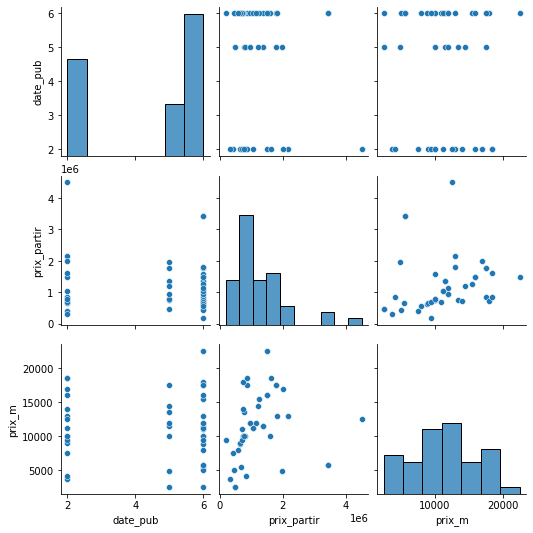

In [53]:
sns.pairplot(df)

In [54]:
corel=df.corr()
corel

,date_pub,prix_partir,prix_m
date_pub,1.000000,-0.025023,-0.039074
prix_partir,-0.025023,1.000000,0.164894
prix_m,-0.039074,0.164894,1.000000


<AxesSubplot:>

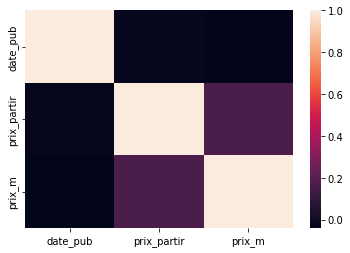

In [55]:
sns.heatmap(corel) 

C:\Users\sbaia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix_m', ylabel='Density'>

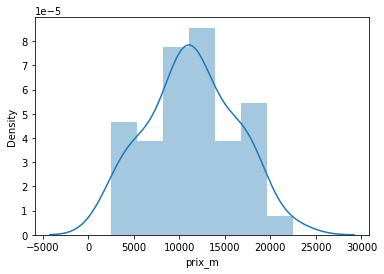

In [56]:
sns.distplot(df['prix_m']) #Affichage du Prix m

C:\Users\sbaia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix_partir', ylabel='Density'>

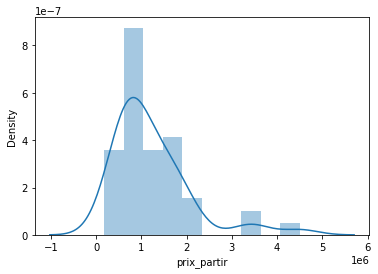

In [57]:
sns.distplot(df['prix_partir']) #Affichage du Prix a partir

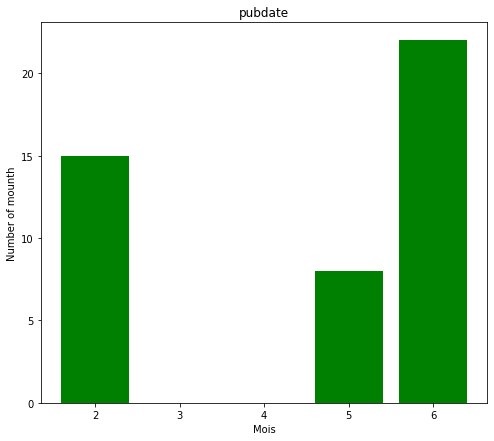

In [58]:
from collections import Counter
fig, ax = plt.subplots(figsize=(8, 7))
count = Counter(df['date_pub'])
labels = []

for i in count:
    labels.append(i)
    
plt.bar(labels, count.values(), color='green')
plt.title('pubdate')
plt.ylabel('Number of mounth')
plt.xlabel('Mois')
plt.show()